# the Happy House

I did this project as an assignment for "Convolutional Neural Networks" class at coursera.org

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


## 1 - The problem statement

For your next vacation, you decided to spend a week with five of your friends from school. It is a very convenient house with many things to do nearby. But the most important benefit is that everybody has commited to be happy when they are in the house. So anyone wanting to enter the house must prove their current state of happiness.



As a deep learning expert, to make sure the "Happy" rule is strictly applied, you are going to build an algorithm which that uses pictures from the front door camera to check if the person is happy or not. The door should open only if the person is happy. 

You have gathered pictures of your friends and yourself, taken by the front-door camera. The dataset is labbeled. 

<img src="images/house-members.png" style="width:550px;height:250px;">

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


**Details of the "Happy" dataset**:
- Images are of shape (64,64,3)
- Training: 600 pictures
- Test: 150 pictures

In [3]:
def HappyModel(input_shape):
    """
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    X_input = Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
    return model

In [4]:
happyModel = HappyModel((64,64,3))

In [11]:
happyModel.compile(loss='binary_crossentropy',
              optimizer='adam', metrics = ["accuracy"])

In [12]:
happyModel.fit(x = X_train, y = Y_train, epochs = 10, batch_size = 32)

Epoch 1/10
600/600 [==============================] - 12s - loss: 0.5270 - acc: 0.8467    
Epoch 2/10
600/600 [==============================] - 12s - loss: 0.1416 - acc: 0.9467    
Epoch 3/10
600/600 [==============================] - 12s - loss: 0.1357 - acc: 0.9383    
Epoch 4/10
600/600 [==============================] - 12s - loss: 0.0781 - acc: 0.9733    
Epoch 5/10
600/600 [==============================] - 13s - loss: 0.1010 - acc: 0.9767    
Epoch 6/10
600/600 [==============================] - 12s - loss: 0.1022 - acc: 0.9650    
Epoch 7/10
600/600 [==============================] - 12s - loss: 0.0802 - acc: 0.9750    
Epoch 8/10
600/600 [==============================] - 12s - loss: 0.0735 - acc: 0.9683    
Epoch 9/10
600/600 [==============================] - 12s - loss: 0.0586 - acc: 0.9850    
Epoch 10/10
600/600 [==============================] - 12s - loss: 0.0382 - acc: 0.9900    


In [15]:
preds = happyModel.evaluate(X_test, Y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 1s     

Loss = 0.145652037462
Test Accuracy = 0.953333330949


## Conclusion

We got very good accuracy on training set - 99%, but only 95% on testing set. Thus, we have overfitting. The main improvement cold be using "Dropout."

In [16]:
happyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
__________

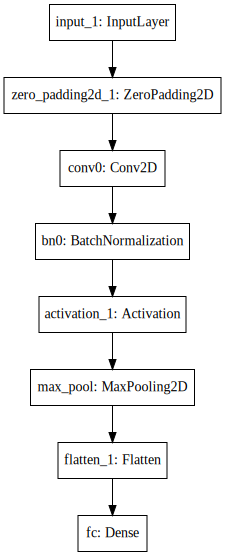

In [17]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))

<img src="images/HappyModel.png" >